In [3]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import MULTIPDB_HOLE
from MDAnalysis.analysis import hole2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'MDAnalysis'

In [40]:
u = mda.Universe("reduced_model_124_ions.psf", "04_equil_124_ions_10ns_first.dcd", in_memory=True, in_memory_step=1)

In [41]:
u.trajectory

<MemoryReader with 501 frames of 58630 atoms>

In [42]:
ha = hole2.HoleAnalysis(u, select='protein', cpoint= [-1.6432, 21.024, -1.827], cvect= [1,0,0], executable='/Users/sukanyakonar/Downloads/hole2-master/exe/hole', sample=0.27, end_radius=22.0, vdwradii_file=None)
ha.run(random_seed=31415)

/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/usr/local/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/usr/local/Cellar/jupyt

In [43]:
gathered = ha.gather()
print(gathered.keys())

dict_keys(['rxn_coord', 'radius', 'cen_line_D'])


In [44]:
print(len(gathered['rxn_coord']))

501


In [45]:
gathered['rxn_coord']

[array([-5.02432e+01, -5.01082e+01, -4.99732e+01, -4.98382e+01,
        -4.97032e+01, -4.95682e+01, -4.94332e+01, -4.92982e+01,
        -4.91632e+01, -4.90282e+01, -4.88932e+01, -4.87582e+01,
        -4.86232e+01, -4.84882e+01, -4.83532e+01, -4.82182e+01,
        -4.80832e+01, -4.79482e+01, -4.78132e+01, -4.76782e+01,
        -4.75432e+01, -4.74082e+01, -4.72732e+01, -4.71382e+01,
        -4.70032e+01, -4.68682e+01, -4.67332e+01, -4.65982e+01,
        -4.64632e+01, -4.63282e+01, -4.61932e+01, -4.60582e+01,
        -4.59232e+01, -4.57882e+01, -4.56532e+01, -4.55182e+01,
        -4.53832e+01, -4.52482e+01, -4.51132e+01, -4.49782e+01,
        -4.48432e+01, -4.47082e+01, -4.45732e+01, -4.44382e+01,
        -4.43032e+01, -4.41682e+01, -4.40332e+01, -4.38982e+01,
        -4.37632e+01, -4.36282e+01, -4.34932e+01, -4.33582e+01,
        -4.32232e+01, -4.30882e+01, -4.29532e+01, -4.28182e+01,
        -4.26832e+01, -4.25482e+01, -4.24132e+01, -4.22782e+01,
        -4.21432e+01, -4.20082e+01, -4.1

In [46]:
flat = ha.gather(flat=True)
print(len(flat['rxn_coord']))

357949


In [47]:
radii, edges = ha.bin_radii(bins=100, range=None)
means, edges = ha.histogram_radii(bins=100, range=None, aggregator=np.mean)

Text(0.5, 0, 'Pore coordinate $\\zeta$ ($\\AA$)')

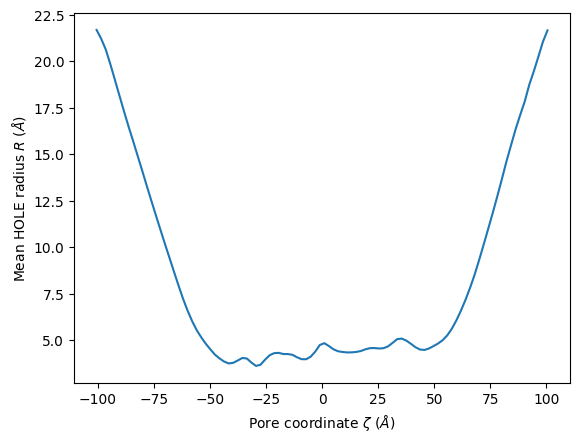

In [48]:
midpoints = 1*(edges[1:]+edges[:-1])
plt.plot(midpoints, means)
plt.ylabel(r"Mean HOLE radius $R$ ($\AA$)")
plt.xlabel(r"Pore coordinate $\zeta$ ($\AA$)")

In [49]:
dat = np.array([midpoints, means])
dat = dat.T
np.savetxt('data_test_hole1_0.27_40ns.test.txt', dat)

In [12]:
ha.create_vmd_surface(filename='channel1_10ns.vmd', dot_density=15, double_water_color='green')

'channel1_10ns.vmd'

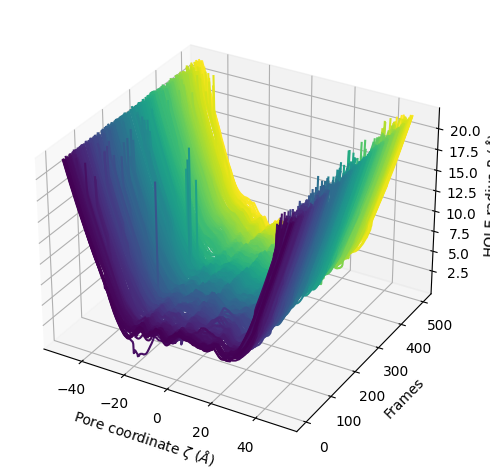

In [50]:
ha.plot3D()
plt.savefig('channel1.3D.15ns.jpg', bbox_inches='tight', dpi=400)

In [51]:
ha.delete_temporary_files()
ha.tmp_files

[]